#Data Importing and Processing

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#EDA

In [49]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
data = df.copy(deep = True)

In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


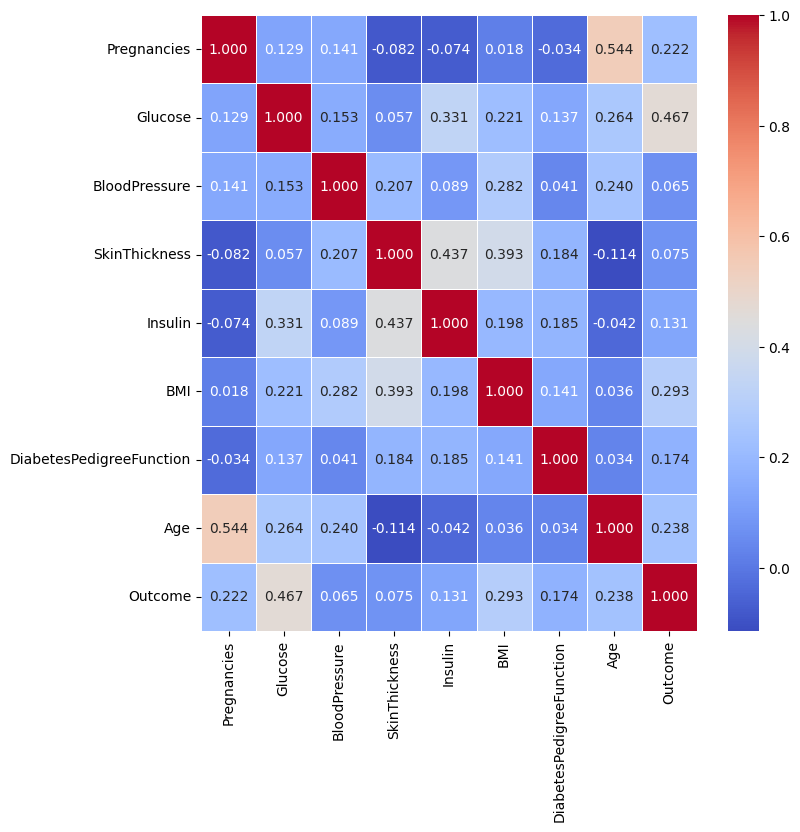

In [53]:
plt.figure(figsize = (8,8))

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.3f', linewidths=.5)
plt.show()

In [54]:
df[["Glucose", "BloodPressure","Insulin", "BMI", "DiabetesPedigreeFunction" ]] = df[["Glucose", "BloodPressure","Insulin", "BMI", "DiabetesPedigreeFunction" ]].replace(0,np.NaN)

In [55]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#Data Vi

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

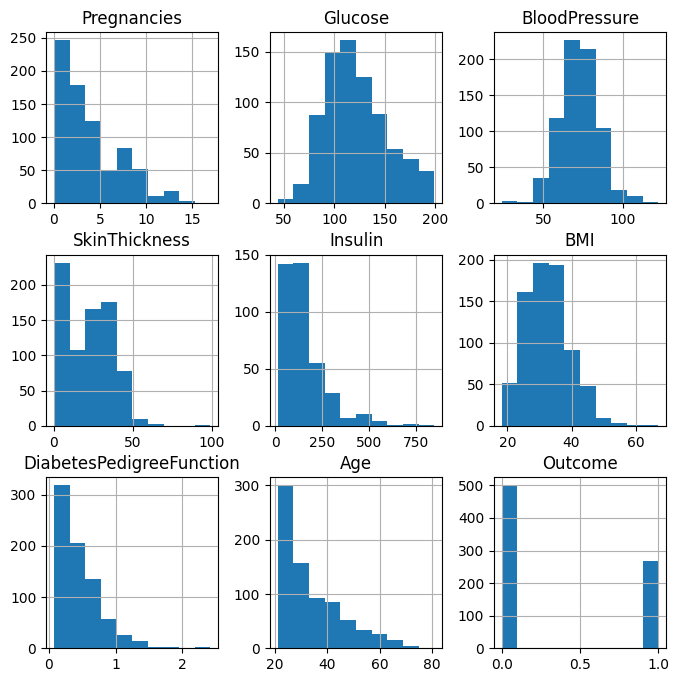

In [56]:
df.hist(figsize = (8,8))

In [57]:
#replacing the NaN values with Mean or median

df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

<Axes: >

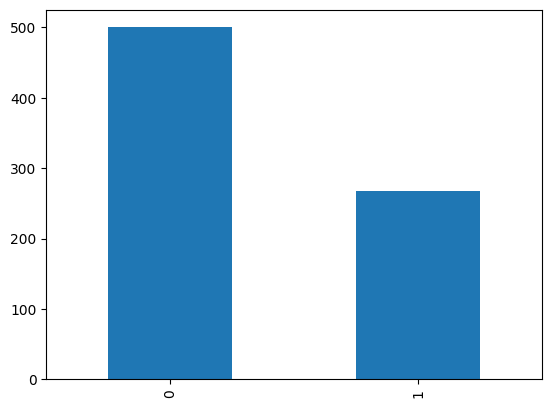

In [58]:
df.Outcome.value_counts().plot(kind = 'bar')

In [59]:
sns.pairplot(df, hue = "Outcome")

Output hidden; open in https://colab.research.google.com to view.

We can see that higher the glucose levels, higher are the chances of the patient being Diabetic

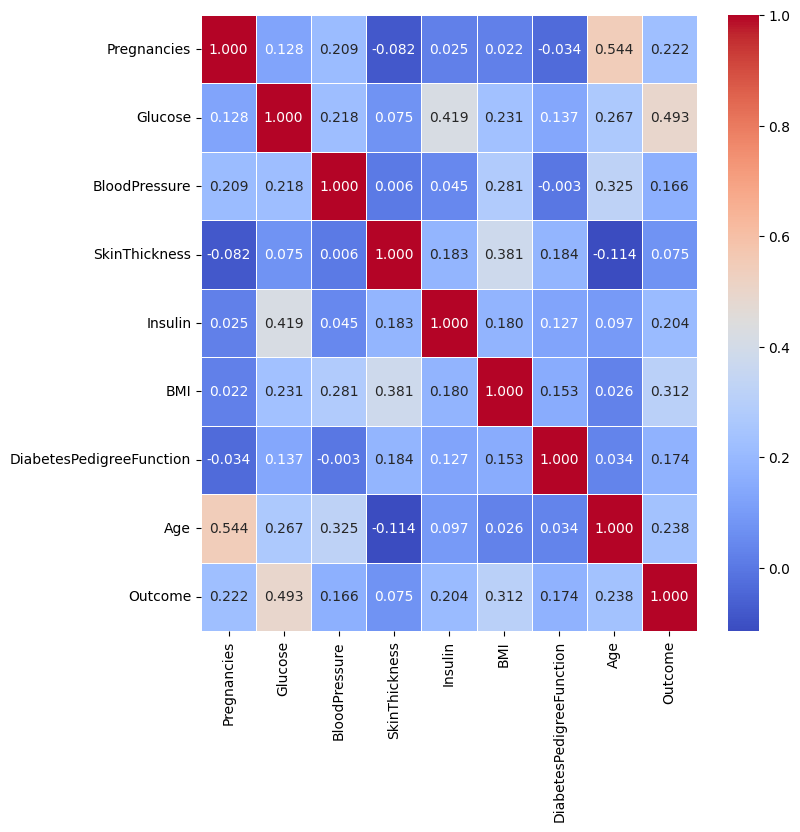

In [67]:
plt.figure(figsize = (8,8))

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.3f', linewidths=.5)
plt.show()

We can see that Flucose has the highest co-reletion of 0.493 followed by BMI with 0.312, then by Age, pregnency and diabetic pedigree Function.

#Splitting DATA

In [68]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [62]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

#Model Training

In [73]:
#K-nearest Neghibours
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1, 15):
  knn = KNeighborsClassifier(i)
  knn.fit(xtrain, ytrain)
  test_scores.append(knn.score(xtest,ytest))
  train_scores.append(knn.score(xtrain,ytrain))

In [74]:
test_scores

[0.7272727272727273,
 0.7532467532467533,
 0.7922077922077922,
 0.7662337662337663,
 0.7727272727272727,
 0.7792207792207793,
 0.7597402597402597,
 0.7727272727272727,
 0.7662337662337663,
 0.7662337662337663,
 0.7857142857142857,
 0.7662337662337663,
 0.7792207792207793,
 0.7662337662337663]

In [75]:
train_scores

[1.0,
 0.8355048859934854,
 0.8452768729641694,
 0.8094462540716613,
 0.8127035830618893,
 0.7980456026058632,
 0.8045602605863192,
 0.7882736156351792,
 0.7866449511400652,
 0.7801302931596091,
 0.7785016286644951,
 0.7866449511400652,
 0.7882736156351792,
 0.7817589576547231]

In [83]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print("test score {}% and k = {}". format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

test score 79.22077922077922% and k = [3]


In [84]:
from sklearn.svm import SVC
classi = SVC(kernel = 'rbf')
classi.fit(xtrain, ytrain)
ypred = classi.predict(xtest)
ypred

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ytest,ypred))
confusion_matrix(ytest,ypred)

0.7727272727272727


array([[94, 13],
       [22, 25]])

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ytest,ypred))
confusion_matrix(ytest,ypred)

0.8116883116883117


array([[97, 10],
       [19, 28]])

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ytest,ypred))
confusion_matrix(ytest,ypred)

0.7597402597402597


array([[87, 20],
       [17, 30]])

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ytest,ypred))
confusion_matrix(ytest,ypred)

0.7597402597402597


array([[87, 20],
       [17, 30]])